In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as md
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
from MDAnalysis.transformations import boxdimensions

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
data2=pd.read_csv('proton_aimd_1ns_every0.5fs-1.ener',header=0,names=['#Step','Time[fs]','Kin.[a.u.]','Temp[K]','Pot.[a.u.]','Cons Qty[a.u.]','UsedTime[s]','[2]','[3]','[4]'],sep='\s+')
data1=pd.read_csv('water_aimd_1ns_every0.5fs-1.ener',header=0,names=['#Step','Time[fs]','Kin.[a.u.]','Temp[K]','Pot.[a.u.]','Cons Qty[a.u.]','UsedTime[s]','[2]','[3]','[4]'],sep='\s+')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


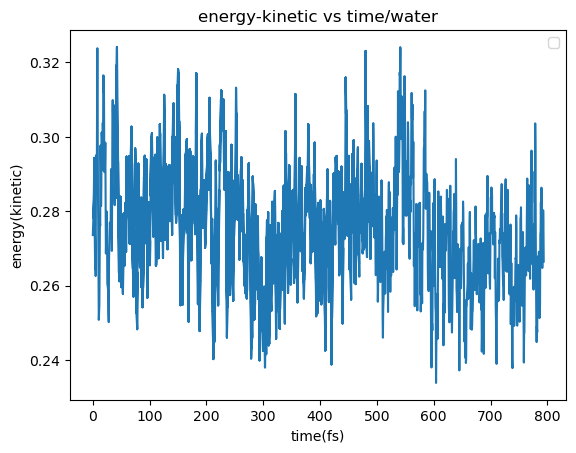

In [40]:
plt.plot(data1['Time[fs]'],data1['Kin.[a.u.]'])
plt.legend()
plt.xlabel('time(fs)')
plt.ylabel('energy(kinetic)')
plt.title('energy-kinetic vs time/water')
plt.savefig('/home/yx2892/comp-lab-class/Week12/figure/energy-water_proton.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


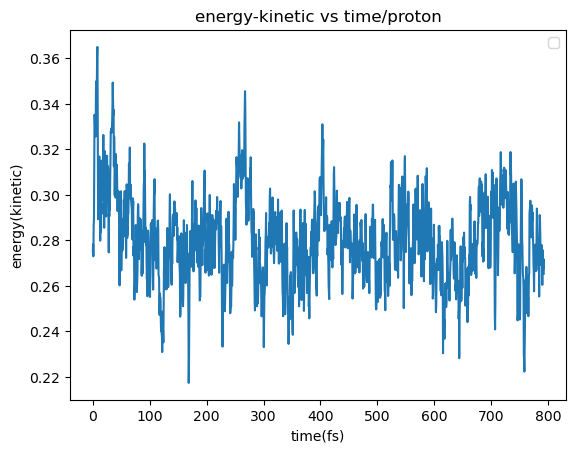

In [41]:
plt.plot(data2['Time[fs]'],data2['Kin.[a.u.]'])
plt.legend()
plt.xlabel('time(fs)')
plt.ylabel('energy(kinetic)')
plt.title('energy-kinetic vs time/proton')
plt.savefig('/home/yx2892/comp-lab-class/Week12/figure/energy-kinetic_proton.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


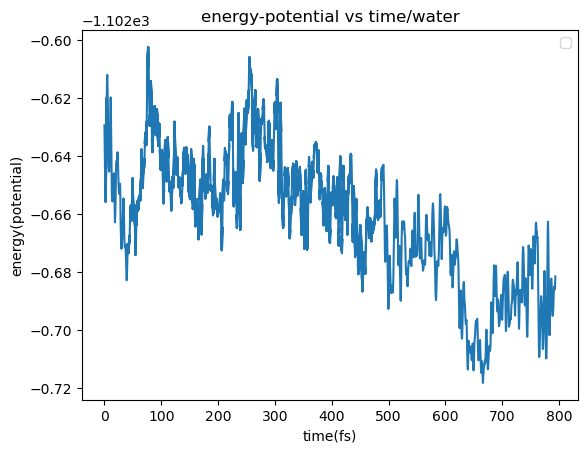

In [38]:
plt.plot(data1['Time[fs]'],data1['Pot.[a.u.]'])
plt.legend()
plt.xlabel('time(fs)')
plt.ylabel('energy(potential)')
plt.title('energy-potential vs time/water')
plt.savefig('/home/yx2892/comp-lab-class/Week12/figure/energy-potential_water.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


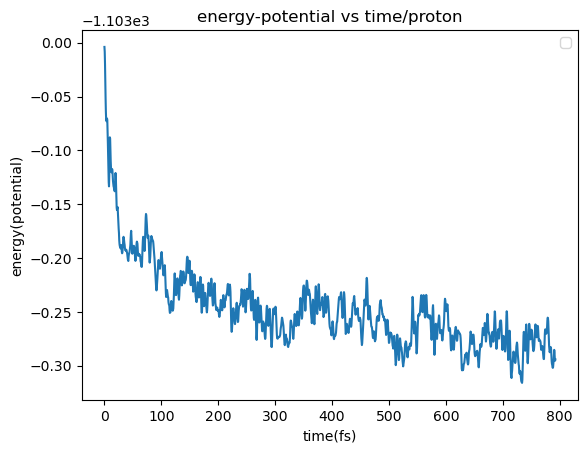

In [39]:
plt.plot(data2['Time[fs]'],data2['Pot.[a.u.]'])
plt.legend()
plt.xlabel('time(fs)')
plt.ylabel('energy(potential)')
plt.title('energy-potential vs time/proton')
plt.savefig('/home/yx2892/comp-lab-class/Week12/figure/energy-potential_proton.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


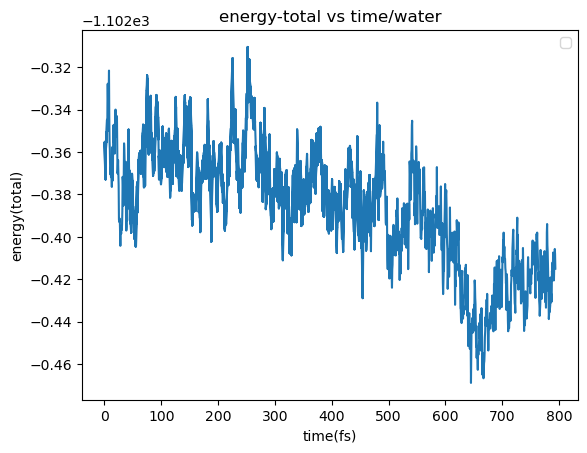

In [36]:
plt.plot(data1['Time[fs]'],(data1['Pot.[a.u.]']+data1['Kin.[a.u.]']))
plt.legend()
plt.xlabel('time(fs)')
plt.ylabel('energy(total)')
plt.title('energy-total vs time/water')
plt.savefig('/home/yx2892/comp-lab-class/Week12/figure/energytotal_water.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


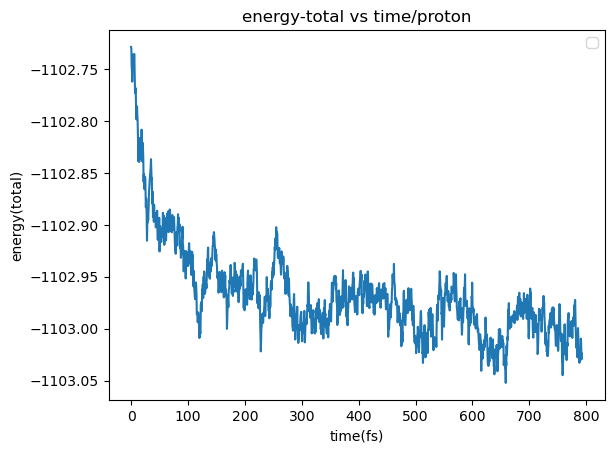

In [37]:
plt.plot(data2['Time[fs]'],(data2['Pot.[a.u.]']+data2['Kin.[a.u.]']))
plt.legend()
plt.xlabel('time(fs)')
plt.ylabel('energy(total)')
plt.title('energy-total vs time/proton')
plt.savefig('/home/yx2892/comp-lab-class/Week12/figure/energytotal_proton.png')

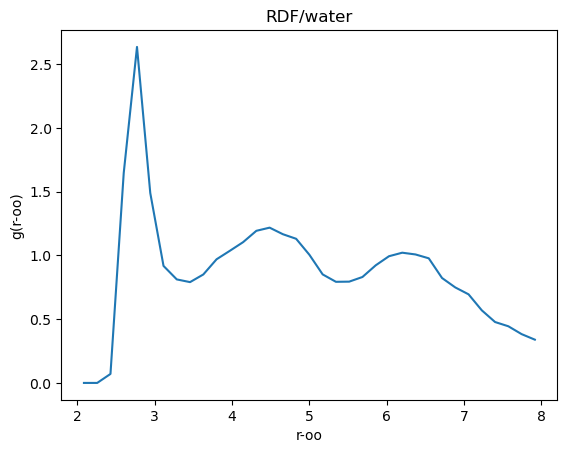

<Figure size 640x480 with 0 Axes>

In [34]:
traj1=mda.Universe('water.xyz','water_aimd_1ns_every0.5fs-pos-1.xyz')
traj1.trajectory.add_transformations(boxdimensions.set_dimensions([12.42, 12.42, 12.42, 90, 90, 90]))
rdf1=rdf.InterRDF(traj1.select_atoms('name O'),traj1.select_atoms('name O'),nbins=35,range=(2,8))
rdf1.run()
plt.plot(rdf1.results.bins, rdf1.results.rdf)
plt.xlabel('r-oo')
plt.ylabel('g(r-oo)')
plt.title('RDF/water')
plt.show()
plt.savefig('/home/yx2892/comp-lab-class/Week12/figure/rdf_water.png')


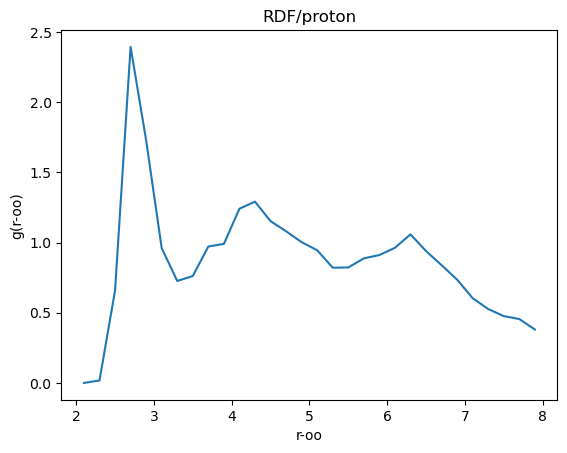

<Figure size 640x480 with 0 Axes>

In [35]:
traj2=mda.Universe('proton.xyz','proton_aimd_1ns_every0.5fs-pos-1.xyz')
traj2.trajectory.add_transformations(boxdimensions.set_dimensions([12.42, 12.42, 12.42, 90, 90, 90]))
rdf2=rdf.InterRDF(traj2.select_atoms('name O'),traj2.select_atoms('name O'),nbins=30,range=(2,8))
rdf2.run()
plt.plot(rdf2.results.bins, rdf2.results.rdf)
plt.xlabel('r-oo')
plt.ylabel('g(r-oo)')
plt.title('RDF/proton')
plt.show()
plt.savefig('/home/yx2892/comp-lab-class/Week12/figure/rdf_proton.png')
